# CS4035 - Cyber Data Analytics
## Lab 2 

## Group Number: 69

## Student 1 
### Name : Konrad Ponichtera
### ID : 5580749

## Student 2
### Name : Ion Babalau
### ID : 5626110

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nbformat

from collections import Counter
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

In [64]:
nb = nbformat.read("Lab2.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 776


## README

Expected location of dataset: _data_ directory, in same directory as notebook. 
All the necessary packages are specifeid in _requirements.txt_, and can be installed with the command: `pip install -r requirements.txt`

## 1. Familiarization task

### Plot visualizations

#### Reading data set

In [22]:
df = pd.read_csv("data/train_data.csv")
df.head()

,Id,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
0,0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [23]:
df.describe()

,Id,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
count,496800.000000,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0,496800.0
mean,248399.500000,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0,0.0
std,143413.951204,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0,0.0
min,0.000000,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0,0.0
25%,124199.750000,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0,0.0
50%,248399.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0,0.0
75%,372599.250000,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0,0.0
max,496799.000000,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0,0.0


#### Cleaning up the data set

There are values we can safely drop, since they don't bring any additional value, like the row ID and the label, which takes only one value.
What's more, there are certain other features like P-201 or P-202 which take only one value.
This means that checking them can be done through simple assertion, without using machine learning.
Therefore we decided to remove them from the data set.

In [24]:
# Drop useless columns
df = df.drop(columns=['Id', 'Label'])

# Drop colums which take only one value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(columns=[col])

#### Measuring correlation

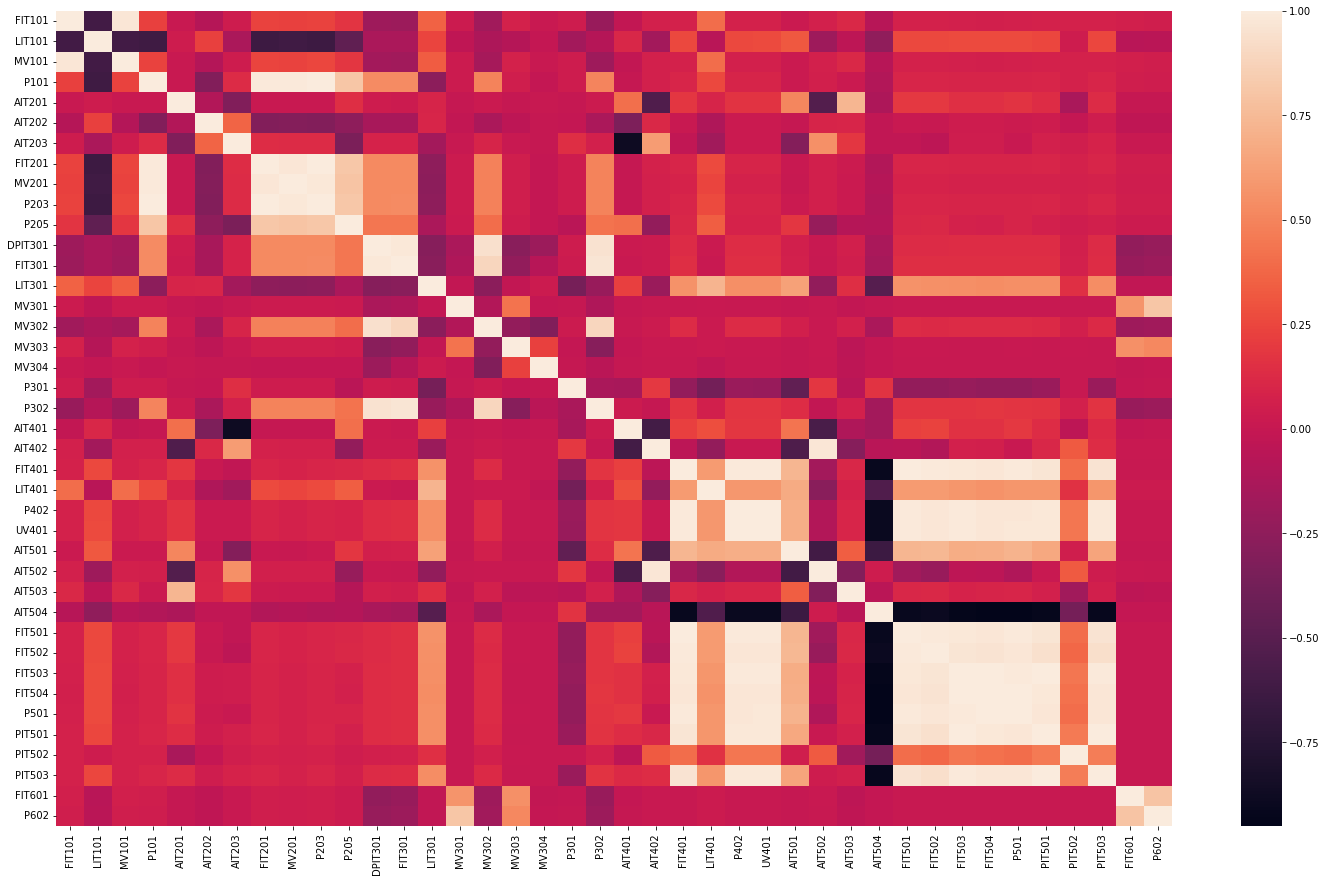

In [25]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr())
plt.show()

#### Observing temporal behavior

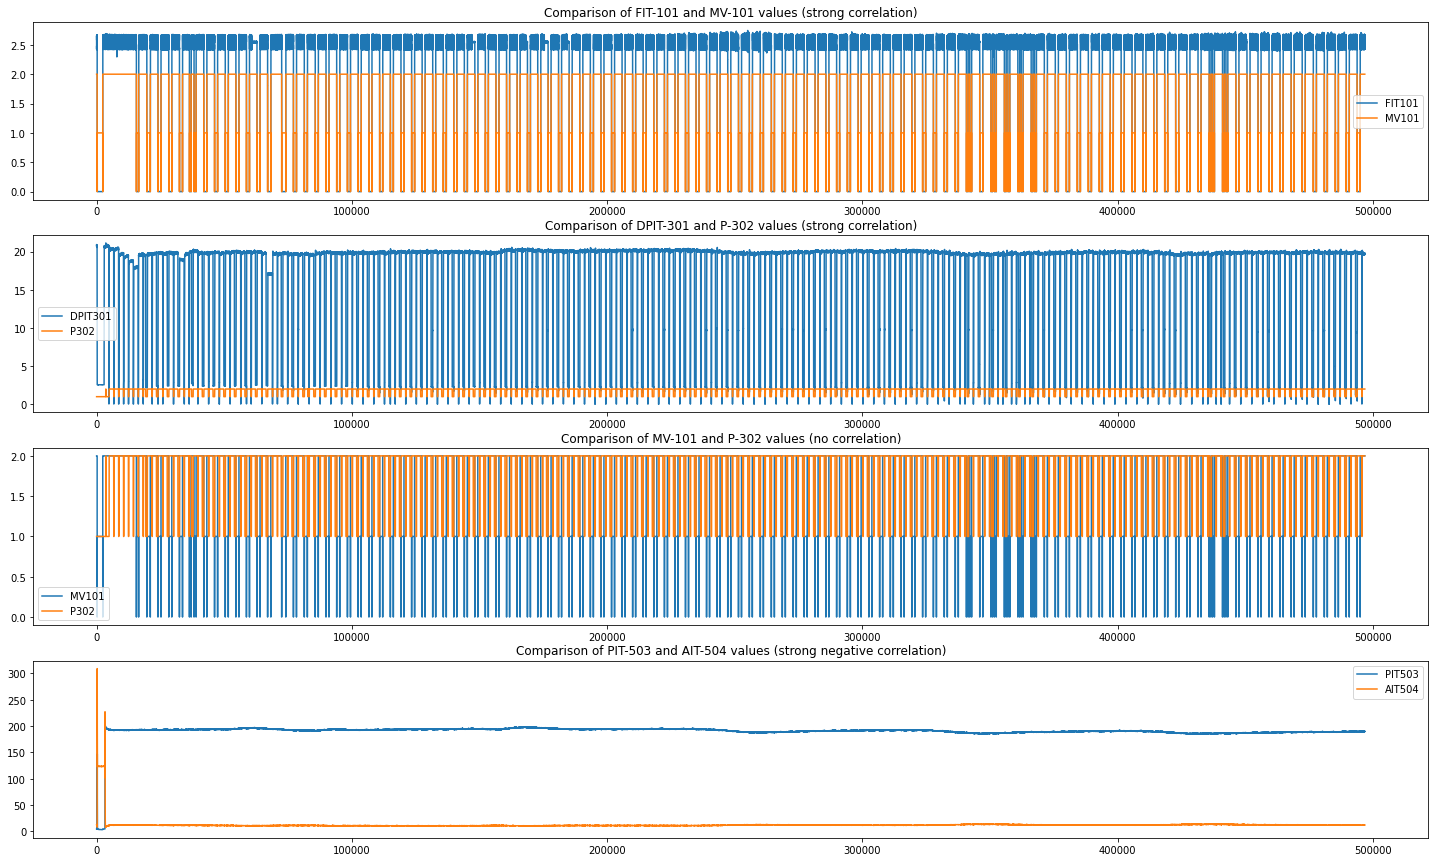

In [26]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(25, 15))
df.plot(ax=ax1, y=['FIT101', 'MV101'], legend=True, title='Comparison of FIT-101 and MV-101 values (strong correlation)')
df.plot(ax=ax2, y=['DPIT301', 'P302'], legend=True, title='Comparison of DPIT-301 and P-302 values (strong correlation)')
df.plot(ax=ax3, y=['MV101', 'P302'], legend=True, title='Comparison of MV-101 and P-302 values (no correlation)')
df.plot(ax=ax4, y=['PIT503', 'AIT504'], legend=True, title='Comparison of PIT-503 and AIT-504 values (strong negative correlation)')
plt.show()

#### Determining potentially abnormal features in the validation set

In [56]:
df_val = pd.read_csv("data/val_data.csv")[0:20000]

df_val_features = df_val.drop(columns=['Id', 'Timestamp'])
# Multiply label to make it stand out from the rest of the plot
df_val_features['Label'] *= -100

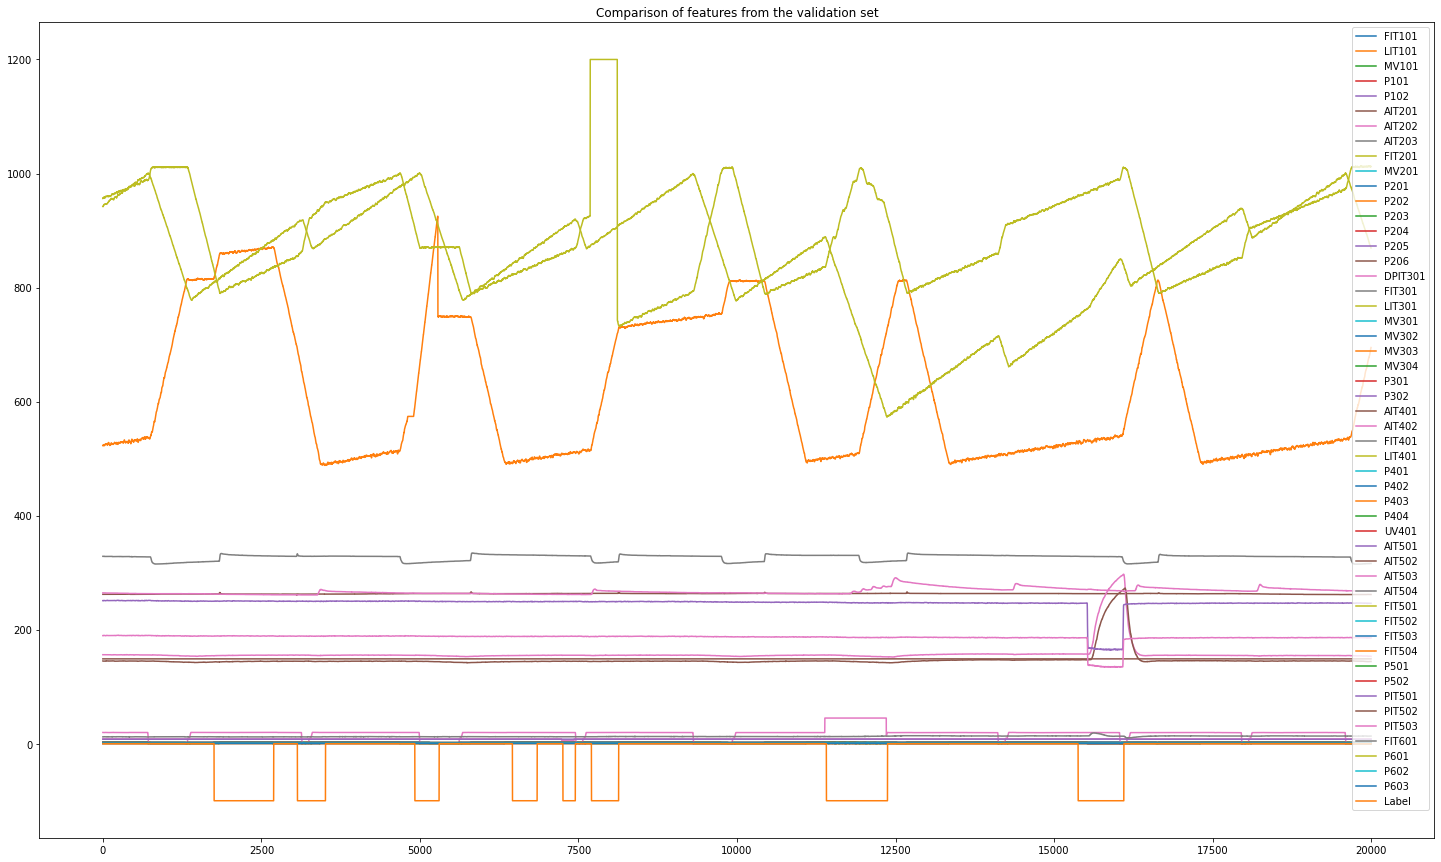

In [57]:
_, ax = plt.subplots(1, 1, figsize=(25, 15))
plt.plot(df_val_features)
ax.legend(labels=df_val_features.columns, loc='upper right')
ax.set_title('Comparison of features from the validation set')
plt.show()

### Answers to the questions

#### What types of signals are there?

The data set contains two types of signals, coming from actuators and sensors.
Some data is represented as numerical values (type `float64`) while the others are integers (`int64`) and sometimes can be seen as category labels ()

#### Are the signals correlated? Do they show cyclic behavior?

Looking at the heatmap we can identify certain pairs of features with strong correlation (for instance FIT-101 and MV-101).
Several features seem to show strongly repetitive behavior overtime (eg. DPIT-301 and P-302).
Some feature (eg. P-201 and P-202) take only one value in the data set, which is why they are represented as white strips on the heatmap.
There are exceptions as well - for example the PIT-503 and the values it is correlated with (eg. FIT-401) seems to revolve around certain value, but do not seem to have any specific cyclic behavior.

In the beginning the behavior of the system is highly irregular for all the features.
The reason might be the fact that the system might have been initializing then.
For this reason it might be beneficial to prune the first 40000 entries before training the anomaly detection machine learning algorithms.

## 2. LOF task – Individual

*Author: Konrad Ponichtera*

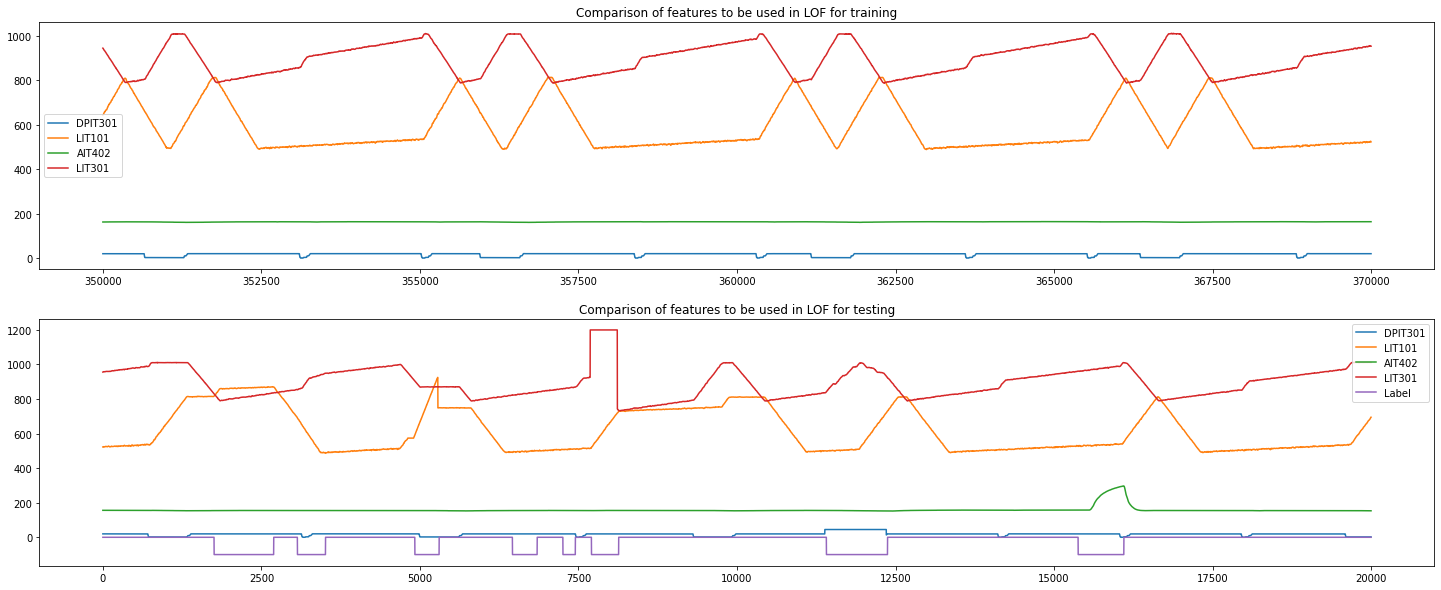

In [58]:
features = ['DPIT301', 'LIT101', 'AIT402', 'LIT301']
features_for_plot = features + ['Label']

X_train = df[features][350000:370000]
y_test = df_val_features[features]
y_test_for_plot = df_val_features[features_for_plot]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(X_train)
ax1.legend(labels=features)
ax1.set_title('Comparison of features to be used in LOF for training')
ax2.plot(y_test_for_plot)
ax2.legend(labels=features_for_plot)
ax2.set_title('Comparison of features to be used in LOF for testing')
fig.show()

### Plot LOF scores

In [59]:
n_neighbors_to_try = [5, 10, 15, 20, 30]

clfs = {}

for n_neighbors in n_neighbors_to_try:
    print(f'Training LOF for {n_neighbors} neighbors')
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, novelty=True, metric='cosine', n_jobs=-1)
    clf.fit(X_train)
    clfs[n_neighbors] = clf

Training LOF for 5 neighbors
Training LOF for 10 neighbors
Training LOF for 15 neighbors
Training LOF for 20 neighbors
Training LOF for 30 neighbors


In [60]:
scores = {}

max_score = 1

for n_neighbors in n_neighbors_to_try:
    print(f'Calculating LOF scores for {n_neighbors} neighbors')
    X_scores = clfs[n_neighbors].score_samples(y_test)
    X_scores *= -1
    scores[n_neighbors] = X_scores

    X_max_score = X_scores.max()
    if X_max_score > max_score:
        max_score = X_max_score

Calculating LOF scores for 5 neighbors


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 10 neighbors


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 15 neighbors


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 20 neighbors


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Calculating LOF scores for 30 neighbors


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


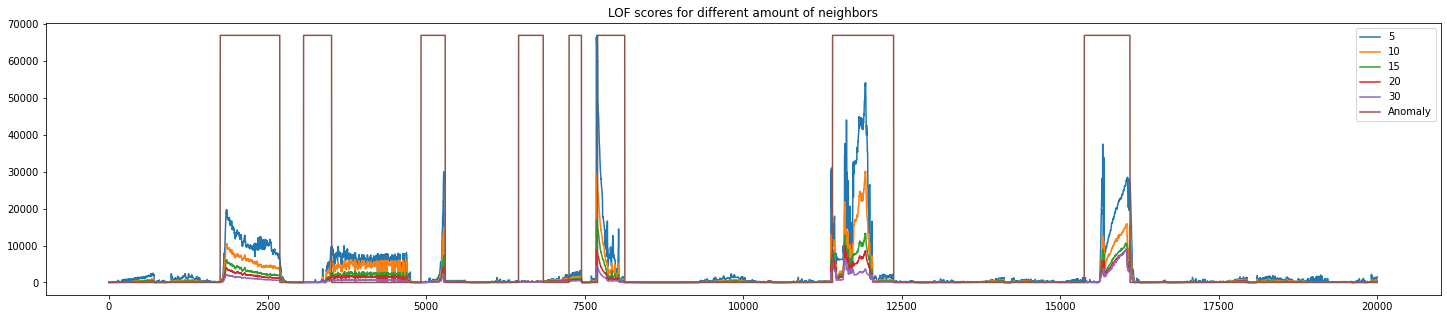

In [61]:
anomaly = pd.DataFrame(scores)
anomaly['Anomaly'] = df_val['Label'] * max_score

_, ax = plt.subplots(1, 1, figsize=(25, 5))
plt.plot(anomaly)
ax.set_title('LOF scores for different amount of neighbors')
ax.legend(labels=anomaly.columns)
plt.show()

### Conclusions

We chose four sensors to analyze for anomalies with LOF: DPIT301, LIT101, AIT402 and LIT301.

After plotting their values from the validation set, we can notice that irregularities in the temporal behavior of these features are responsible for several anomalies that occur there.
Since the beginning of the training set is highly irregular (probably due to the system's startup) and we want to train the model on the normal behavior, we chose the interval of the training set that does not contain any irregularities.

#### Choice of the best performing LOF

We executed LOF for 5, 10, 15, 20 and 30 neighbors and plotted their LOF scores.
It can be seen that the sensitivity of anomaly detection decreases as the amount of neighbors increases.
The best balance seems to be provided by the LOF with amount of neighbors equal to 15, since for detection threshold set to around 5000, it will detect all the true anomalies while avoiding misclassification of the interval between 2500 and 5000 as anomalous.

#### Application of LOF

LOF can be used to model point anomalies, which can also span multiple features.
However, its applicability in practice is severely impaired by the slow training and scoring performance.

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – Individual

*Author: Konrad Ponichtera*

In [322]:
feature = 'LIT101'
df_feature = df[[feature]].to_numpy()

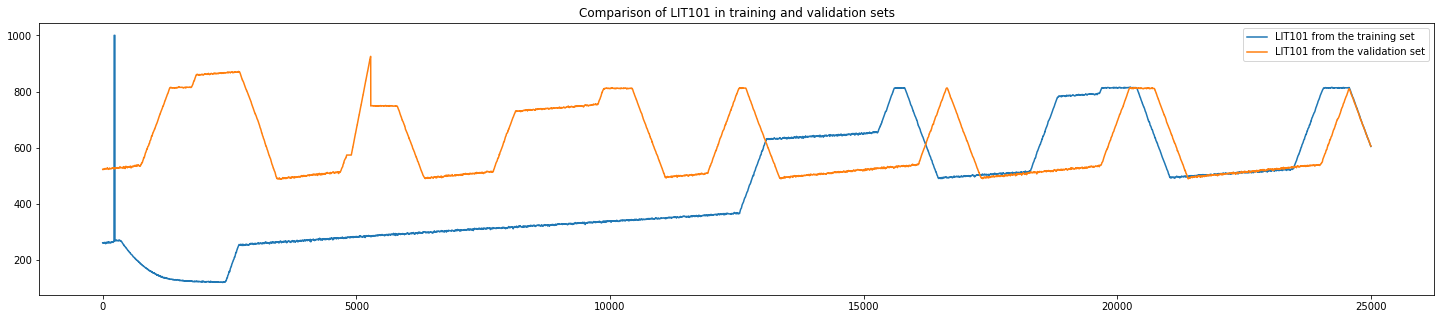

In [323]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))

df[0:len(df_val_features)].plot(ax=ax, y=[feature])
df_val_features.plot(ax=ax, y=[feature])

ax.legend(labels=[f'{feature} from the training set', f'{feature} from the validation set'])
ax.set_title(f'Comparison of {feature} in training and validation sets')
plt.show()

### Discretizing sensor data

In [324]:
def discretize(discretizer, feature_array):
    """
    Discretizes the passed data.

    Arguments:
        discretizer: Discretizer, fitted with the learning data
        feature_array: Numpy array with data to discretize, using the passed discretizer
    Returns:
        Discretized data, passed as feature_array argument
    """
    bins = discretizer.transform(feature_array)[:, 0]
    vectorizer = np.vectorize(lambda x: int(discretizer.bin_edges_[0][int(x)]))

    return vectorizer(bins)

In [325]:
# Discretizer, fitted on the training data
discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
discretizer.fit(df_feature)

df_feature_discretized = discretize(discretizer, df_feature)

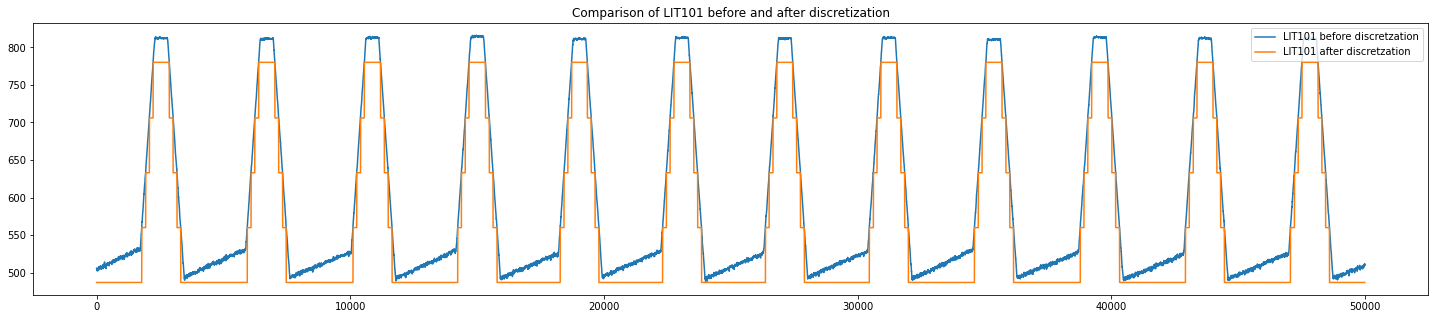

In [326]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(df_feature[150000:200000])
ax.plot(df_feature_discretized[150000:200000])

ax.legend(labels=[f'{feature} before discretzation', f'{feature} after discretzation'], loc='upper right')
ax.set_title(f'Comparison of {feature} before and after discretization')
plt.show()

### Building n-grams

In [327]:
def collect_ngrams(data, window_size, window_step, unique=False, as_strings=False):
    """
    Extracts the n-grams from data

    Arguments:
        data: Numpy array of data to extract the n-grams from
        window_size: Size of the sliding window (n-gram)
        window_step: The step done by the sliding window (if the same as window_size then windows don't overlap)
        unique: 
    Returns:
        Numpy array with extracted n-grams
    """
    sliding_windows = np.empty([0, window_size], dtype=np.int8)
    
    for i in range(0, len(data) - window_size, window_step):
        new_window = data[i:i+window_size]
        if new_window.shape == (window_size,):
            sliding_windows = np.vstack([sliding_windows, new_window])
    if unique:
        sliding_windows = np.unique(sliding_windows, axis=0)
    
    if as_strings:
        sliding_windows = np.array([str(row) for row in sliding_windows])
    
    return sliding_windows

In [328]:
window_size = 3
window_step = 1

# N-grams = unique sliding windows
ngram_names = collect_ngrams(df_feature_discretized[150000:200000], window_size=window_size, window_step=window_step, unique=True, as_strings=True)
print(f'Found n-grams count: {len(ngram_names)}')
print(ngram_names)

Found n-grams count: 21
['[487 487 487]' '[487 487 560]' '[487 560 560]' '[560 487 487]'
 '[560 560 487]' '[560 560 560]' '[560 560 633]' '[560 633 633]'
 '[633 560 560]' '[633 633 560]' '[633 633 633]' '[633 633 706]'
 '[633 706 706]' '[706 633 633]' '[706 706 633]' '[706 706 706]'
 '[706 706 780]' '[706 780 780]' '[780 706 706]' '[780 780 706]'
 '[780 780 780]']


### Building n-gram frequency table

In [329]:
def build_ngram_table(df, large_window_size, large_window_step, ngram_names=None):
    df_ngrams = pd.DataFrame()

    for i in range(0, len(df) - large_window_size, large_window_step):
        new_window = df[i:i+large_window_size]

        ngrams = collect_ngrams(new_window, window_size=window_size, window_step=window_step, as_strings=True)
        counter = Counter(ngrams)

        df_window = pd.DataFrame(counter, index=[i])
        df_ngrams = pd.concat([df_ngrams, df_window])

    # Filter ngrams
    if ngram_names is not None:
        df_ngrams = df_ngrams[df_ngrams.columns.intersection(ngram_names)]
        
    # Fill NaNs with zeros, for the windows where the ngram didn't appear
    df_ngrams = df_ngrams.fillna(0)
    return df_ngrams

In [357]:
large_window_size = 15
large_window_step = 15

df_ngrams = build_ngram_table(df_feature_discretized, large_window_size=large_window_size, large_window_step=large_window_step, ngram_names=ngram_names)

df_ngrams.head()

,[487 487 487],[487 487 560],[487 560 560],[560 560 560],[560 560 633],[560 633 633],[633 633 633],[633 633 560],[633 560 560],[706 706 706],...,[780 780 780],[780 780 706],[780 706 706],[706 706 633],[706 633 633],[560 560 487],[560 487 487],[633 706 706],[706 780 780],[633 633 706]
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Validating

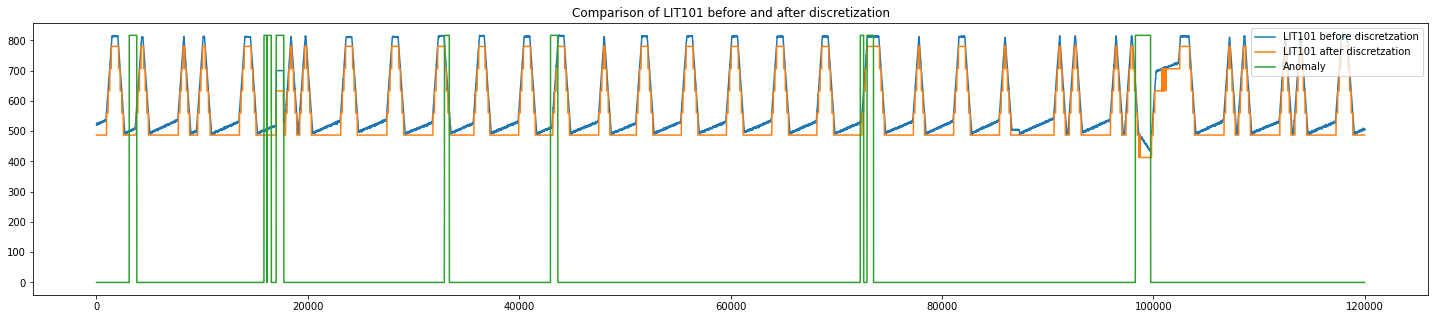

In [358]:
df_val = pd.read_csv("data/val_data.csv")[100000:220000]
df_val_feature = df_val[[feature]].to_numpy()
df_val_label = df_val[['Label']].to_numpy()

df_val_feature_discretized = discretize(discretizer, df_val_feature)

_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(df_val_feature)
ax.plot(df_val_feature_discretized)
ax.plot(df_val_label * df_val_feature.max())

ax.legend(labels=[f'{feature} before discretzation', f'{feature} after discretzation', 'Anomaly'], loc='upper right')
ax.set_title(f'Comparison of {feature} before and after discretization')
plt.show()

In [359]:
df_val_ngrams = build_ngram_table(df_val_feature_discretized, large_window_size=large_window_size, large_window_step=large_window_step, ngram_names=ngram_names)
df_val_ngrams.head()

,[487 487 487],[487 487 560],[487 560 560],[560 560 560],[560 560 633],[560 633 633],[633 633 633],[633 633 706],[633 706 706],[706 706 706],...,[780 780 780],[633 633 560],[633 560 560],[560 560 487],[560 487 487],[706 706 780],[780 780 706],[706 706 633],[706 633 633],[780 706 706]
0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


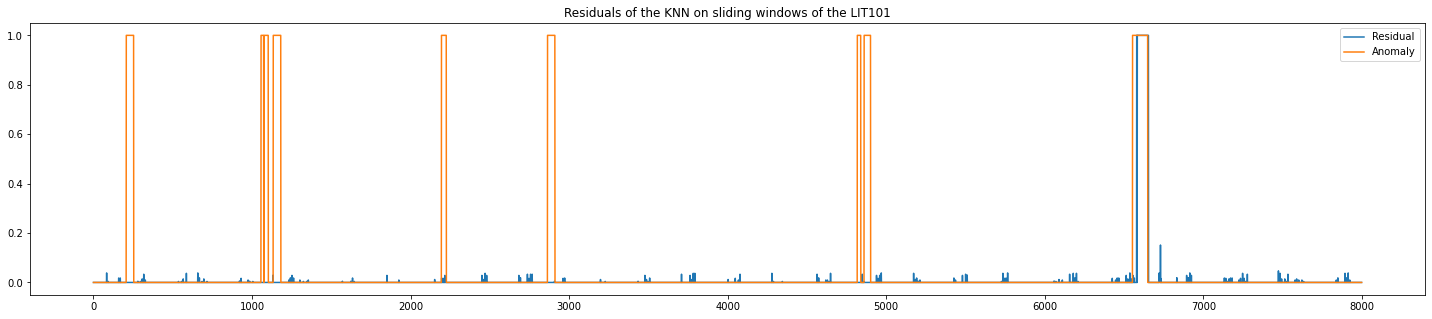

In [360]:
nbrs = NearestNeighbors(n_neighbors=1, metric='cosine')
nbrs.fit(df_ngrams)

residuals, _ = nbrs.kneighbors(df_val_ngrams)

_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(residuals)
# Subsample the original labels set to match the one with the sliding windows
ax.plot(df_val_label[::len(df_val_label)//len(residuals)])

ax.legend(labels=['Residual', 'Anomaly'], loc='upper right')
ax.set_title(f'Residuals of the KNN on sliding windows of the {feature}')
plt.show()

### Differencing sensor data

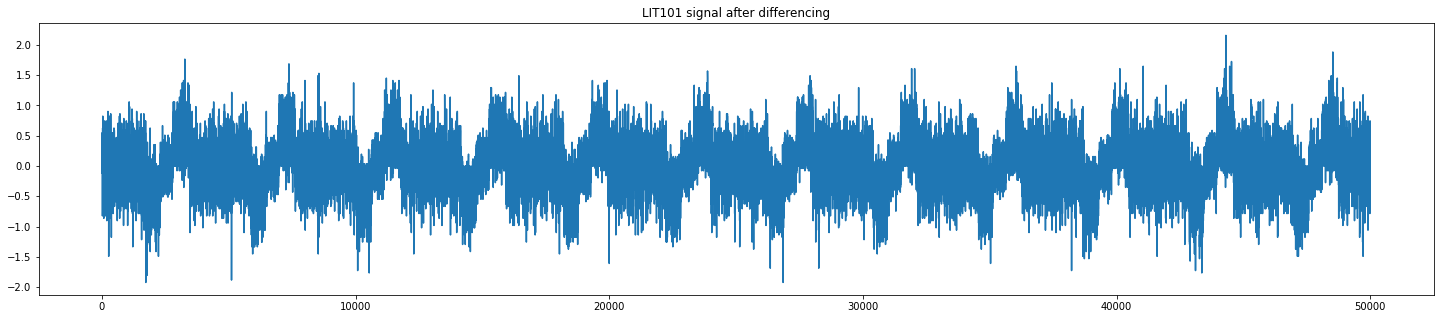

In [361]:
diff_feature = np.copy(df_feature)
for i in range(1, len(diff_feature)):
    diff_feature[i] = df_feature[i-1] - df_feature[i]

diff_feature = diff_feature[1:]

_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(diff_feature[150000:200000])
ax.set_title(f'{feature} signal after differencing')
plt.show()

In [362]:
diff_discretizer = KBinsDiscretizer(n_bins=20000, strategy='uniform', encode='ordinal')
diff_discretizer.fit(diff_feature)

diff_feature_discretized = discretize(diff_discretizer, diff_feature)

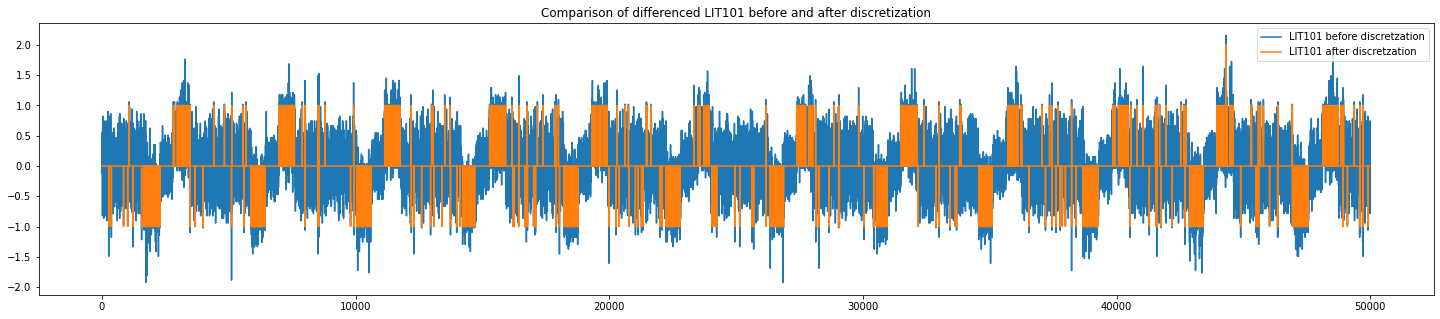

In [363]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))

ax.plot(diff_feature[150000:200000])
ax.plot(diff_feature_discretized[150000:200000])

ax.legend(labels=[f'{feature} before discretzation', f'{feature} after discretzation'], loc='upper right')
ax.set_title(f'Comparison of differenced {feature} before and after discretization')
plt.show()

### Conclusions

The feature of choice for this task was LIT101.
Our implementation of the n-gram managed to detect one anomaly out of two that occurred to the signal in the range under analysis.

#### Differencing

In case of our analysed signal, differencing does not bring anything beneficial from perspective of anomaly detection.
Differencing before discretization effectively turns the continuous signal into noise, which would require setting up the bin count to ridiculous amounts (eg. 20000) and would increase the amount of n-grams to unanalyzable amounts.

#### Application of n-grams

N-grams can be used to model contextual anomalies, preferably the ones with cyclic temporal behavior.
This comes from the fact that in the data processing pipeline of this method, it is necessary to collect signal behavior, which is known in advance to be working properly.
That behavior is portrayed by the individual n-grams.

## Comparison